# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [117]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [118]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [ ]:
# Ваш код здесь

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [120]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг корреляционной матрицы:  8
Определитель корреляционной матрицы:  0.0007299388072652095


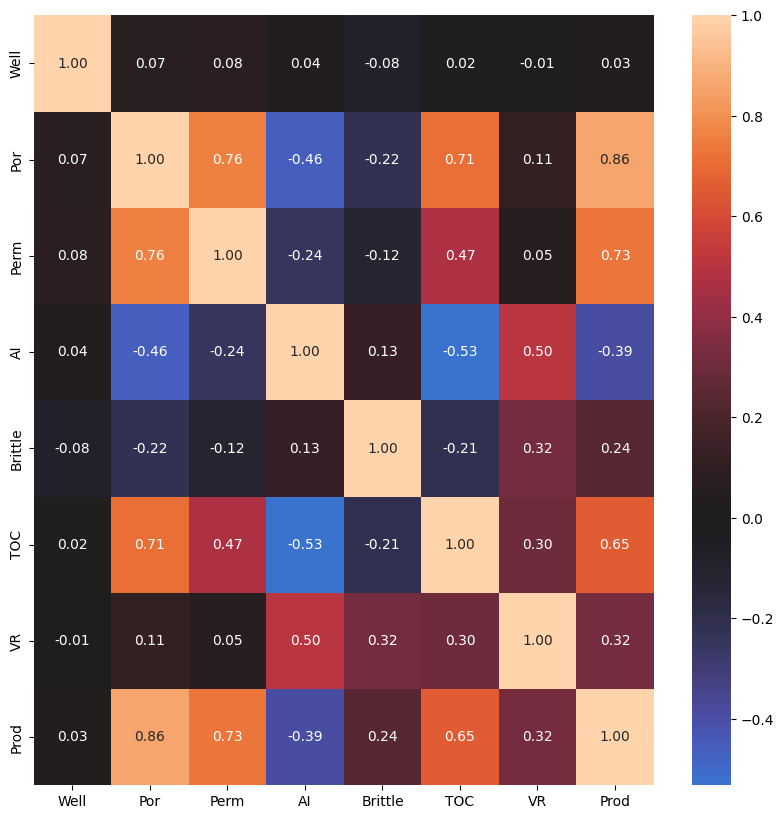

In [121]:
# стандартизируем векторы в столбцах матрицы A
A = data
A_cent = A - A.mean(axis=0)
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
# матрица Грама - она же матрица корреляций
cor_matrix = A_st.T @ A_st
# отобразим матрицу корреляций на теплограмме
plt.figure(figsize=(10,10))  
sns.heatmap(cor_matrix,fmt='.2f',annot=True, center=0)

print('Ранг корреляционной матрицы: ',np.linalg.matrix_rank(cor_matrix))
print('Определитель корреляционной матрицы: ',np.linalg.det(cor_matrix))


> *Ваши выводы здесь
> * Пористость скважины (Por) и проницаемость скважины (Perm) сильнее всего коррелируют с целевой переменной (сильная связь)
> * Ранг матрицы равен 8, что равно количеству фактоов. Следовательно наша матрица является линейно независимой - это матрица полного ранга.
> * А вот определитель корреляционной матрцы практически равен 0, т.е. она является плохо обусловленной или практически вырожденной.
> * Судя по тому, что матрица имеет максимальный ранг, но определитель матрицы очень близок к нулю, то мы столкнулись с таким случаем как мультиколлинеарность.
> * В данном случае модель классической линейной регрессии по методу наименьших квадратов мало применима. При компьютерных вычислениях такие матрицы могут спровоцировать неприятности: они являются триггером для большого количества вычислительных ошибок, так как при вычислении обратной матрицы мы будем вынуждены делить на определитель. Деление на число, близкое к 0, не выдаст ошибки, однако элементы обратной матрицы будут стремиться к бесконечности. 

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [122]:
# Ваш код здесь
X = data.drop(['Prod'], axis=1)
y = data['Prod']
# добавляем столбец единиц
A = np.column_stack((np.ones(200), X))
# проверим размерность
print(A.shape)
# вычислим OLS-оценку для коэффициентов
vector = np.linalg.inv(A.T@A)@A.T@y
print(vector.round())

(200, 8)
[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Ваши выводы здесь*
> * в представленных данных признак Well (идентификатор скважины) является неинформативным, т.к. его коэффициент равен 0, следовательно он не оказывает влияния на целевую переменную.
> 
> * коэффициент 230 при признаке Por (пористость скважины) показывает прямую зависимость с целевой переменной, т.е. при росте показателя пористости на 1% добыча газа увеличивается на 230 млн.куб.футов. 
> 
> * А вот показатель акустического импендаса оказывает обратный эффект: при его повышении на 1 $кг/м^2 * 10^6$ добыча газа снижается на 365 млн.куб.футов. 


### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [123]:
# Ваш код здесь
# Теперь составим прогноз нашей модели:
new=np.array([[1,106,15.32,3.71,3.29,55.99,1.35,2.42]])
print('Прогноз для предложенной скважины:', new@vector)
print('Абсолютная ошибка прогноза для предложенной скважины: ', (4748.315024 - new@vector))

from sklearn import metrics
# построим прогноз выработки газа для всех скважин из наших данных
y_pred = A@vector
# в качестве метрики будем использовать абсолютную ошибку в процентах 
print('MAPE:', metrics.mean_absolute_percentage_error(y, y_pred))


Прогноз для предложенной скважины: [4723.06405371]
Абсолютная ошибка прогноза для предложенной скважины:  [25.25097029]
MAPE: 0.0362794684513406


> *Ваши выводы здесь*\
> Учитывая значение метрики наша модель обладает достаточно хорошим качеством. Средняя абсолютная ошибка в процентах составлят всего лишь 3%.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

> *Ваши выводы здесь*
> 
> В нашей модели есть один фактор (TOC — общий органический углерод) у которого коэффицент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции. А именно, корреляция говорит, что зависимость между ТОС и целевой переменной прямая, а модель показывает обратную зависимость, т.к. коэффициент меньше 0.
> 
> Скорее всего это связано с мультиколлинеарностью модели.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [124]:
# Ваш код здесь
# Из первоначальных данных исключаем факторы у которых корреляция с целевой перемнной больше 0.7 или меньше 0.05, а также целевую переменную
X = data.drop(['Well', 'Por', 'Perm', 'Prod'], axis=1)
y = data['Prod']
# добавляем столбец единиц
A = np.column_stack((np.ones(200), X))
# проверим размерность
print(A.shape)
# вычислим OLS-оценку для коэффициентов
vector = np.linalg.inv(A.T@A)@A.T@y
print(vector.round())

# построим прогноз выработки газа для всех скважин из наших данных
y_pred = A@vector
# в качестве метрик будем использовать абсолютную ошибку в процентах и коэффицент детерминации
print('MAPE:', metrics.mean_absolute_percentage_error(y, y_pred))

(200, 5)
[2047. -313.   25. 1231.  404.]
MAPE: 0.12561446803950863


> *Ваши выводы здесь*
>
> * коэффициент -313 при признаке AI — акустический импеданс показывает обратную зависимость с целевой переменной, т.е. при росте показателя импенданса на 1 $кг/м^2 * 10^6$% добыча газа снижается на 313 млн.куб.футов. В ранее рассчитаной модели коэффицент при этом факторе был на 17% меньше и составлял -365.
> 
> * При этом фактор Brittle (коэффициент хрупкости скважины); оказывает прямой эффект: при его повышении на 1% добыча газа увеличивается на 25 млн.куб.футов. По сравнению с ранее рассчитанной моделью данный коэффициент не изменился.
> 
> * Что касается метрики, то ее значение ухудшилось: средняя абсолютная ошибка в процентах увеличилась с 3% до 12.5%. Ухудшение метрики связано с тем, что мы исключили из данных факторы, которые сильно связаны с целевой переменной.
> 
> * Но из положительных моментов стоит отметить то, что удалось побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции, теперь они "однонаправленны".


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [125]:
# Ваш код здесь
from sklearn import linear_model 

#Создаём объект класса LinearRegression
lin_reg = linear_model.LinearRegression()
#Обучаем модель
lin_reg.fit(X, y)

#Делаем предсказание класса
y_pred = lin_reg.predict(X)

print('Интерсепт = ', lin_reg.intercept_.round(), '; остальные коэффициенты: ', lin_reg.coef_.round())

print('MAPE:', metrics.mean_absolute_percentage_error(y, y_pred))


Интерсепт =  2047.0 ; остальные коэффициенты:  [-313.   25. 1231.  404.]
MAPE: 0.12561446803950568


> *Ваши выводы здесь*
> В итоге получили те же самые результаты, что и в предыдущем шаге, т.е. расчет вручную по результативности ничем не отличается от библиотечной реализации.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [126]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [176]:
# Ваш код здесь
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model 
from sklearn.model_selection import cross_validate

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# стандартизируем наши данные
X_scaled = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

#Создаём объект класса LinearRegression
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly, y)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lin_reg, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

# строка для итогового задания
s1 = ['LinearRegression', 
      '-', 
      True, 
      round(-cv_results['train_score'].mean()*100, 2),
      round(-cv_results['test_score'].mean()*100, 2)]

MAPE на тренировочных фолдах: 10.42 %
MAPE на валидационных фолдах: 14.46 %


> *Ваши выводы здесь*
> Получили достаточно хороший результат: метрика на тренировочном наборе 10% и на валидационном - 14%. Модель не переобучена

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [175]:
# Ваш код здесь
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param ={'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]}

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso()
grid_search=GridSearchCV(scoring='neg_mean_absolute_percentage_error', estimator=lasso, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(X_poly, y)
print(grid_search.best_params_)
lasso=Lasso(alpha=grid_search.best_params_['alpha'])
lasso.fit(X_poly, y)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

# строка для итогового задания
s2 = ['Lasso', 
      grid_search.best_params_, 
      True, 
      round(-cv_results['train_score'].mean()*100, 2),
      round(-cv_results['test_score'].mean()*100, 2)]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.987e+07, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.286e+07, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

{'alpha': 50}
MAPE на тренировочных фолдах: 11.90 %
MAPE на валидационных фолдах: 12.93 %


> *Ваши выводы здесь*\
> Полиномиальная регрессия с L1-регуляризацией ухудшила нашу метрику на тренировочном наборе данных, но в то же время улучшила на валидационном фолде. Т.е. у нас сократилась разница между метриками.\
> Лучшим значением коэффициента параметра регуляризации alpha является значение 50

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [177]:
# Ваш код здесь
from sklearn.linear_model import Ridge

param ={'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]}

# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge()
grid_search=GridSearchCV(scoring='neg_mean_absolute_percentage_error', estimator=ridge, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(X_poly, y)
print(grid_search.best_params_)
ridge=Ridge(alpha=grid_search.best_params_['alpha'])
ridge.fit(X_poly, y)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

# строка для итогового задания
s3 = ['Ridge', 
      grid_search.best_params_, 
      True, 
      round(-cv_results['train_score'].mean()*100, 2),
      round(-cv_results['test_score'].mean()*100, 2)]

{'alpha': 5}
MAPE на тренировочных фолдах: 10.85 %
MAPE на валидационных фолдах: 13.32 %


> *Ваши выводы здесь*\
> Полиномиальная регрессия с L2-регуляризацией отработала хуже, чем с L1-регуляризацией. Разница между метриками на тренировочных и валидационных фолдах увеличилась, при этом метрика на валидационном наборе данных стала хуже.\
> Лучшим значением коэффициента параметра регуляризации alpha является значение 5

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [178]:
# Ваш код здесь
from sklearn.linear_model import ElasticNet

param ={'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100], 
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# создаём модель
elasticnet = ElasticNet()
grid_search=GridSearchCV(scoring='neg_mean_absolute_percentage_error', estimator=elasticnet, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(X_poly, y)
print(grid_search.best_params_)
elnet=ElasticNet(alpha=grid_search.best_params_['alpha'], l1_ratio=grid_search.best_params_['l1_ratio'])
elnet.fit(X_poly, y)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(elnet, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

# строка для итогового задания
s4 = ['ElasticNet', 
      grid_search.best_params_, 
      True, 
      round(-cv_results['train_score'].mean()*100, 2),
      round(-cv_results['test_score'].mean()*100, 2)]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.503e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.604e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.970e+06, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+06, tolerance: 1.617e+04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

{'alpha': 50, 'l1_ratio': 1}
MAPE на тренировочных фолдах: 11.90 %
MAPE на валидационных фолдах: 12.93 %


> *Ваши выводы здесь*\
> Учитывая полученные параметры регуляризации мы получили в чистом виде модель с L1-регуляризацией с точно такими же показателями метрик на тренировочных и валидационных фолдах

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [179]:
# Ваш код здесь
df = pd.DataFrame(
    data = [
        s1,
        s2,
        s3,
        s4
    ],
    columns= ['Model', 'Hyperparameters', 'Polynom', 'Train Score', 'Test Score']
)
display(df)

,Model,Hyperparameters,Polynom,Train Score,Test Score
0,LinearRegression,-,True,10.42,14.46
1,Lasso,{'alpha': 50},True,11.90,12.93
2,Ridge,{'alpha': 5},True,10.85,13.32
3,ElasticNet,"{'alpha': 50, 'l1_ratio': 1}",True,11.90,12.93


> *Ваши выводы здесь*
>  Провели анализ данных с помощью полиномиальных моделей линейной регрессии, в т.ч. с использованием регуляризации. Наилучшим качеством является модель с L1-регуляризацией, как по метрике на валидационных фолдах, так и по разнице с метрикой на тренировочных фолдах. Ни одна из моделей не является переобученной. 